In [50]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models
from scipy import optimize
from scipy.optimize import curve_fit

In [93]:
data = pd.read_csv('doppler_free_new.csv')
voltage = np.array(data['voltage'])
time = np.array(data['time'])

data_broad = pd.read_csv('doppler_broad_new.csv')
voltage_broad = np.array(data_broad['voltage'])

In [94]:
df = pd.DataFrame({'time': time, 'voltage' : voltage, 'voltage_broad':voltage_broad})

df

,time,voltage,voltage_broad
0,0.00840,0.372,0.354
1,0.00844,0.376,0.356
2,0.00848,0.374,0.360
3,0.00852,0.376,0.362
4,0.00856,0.378,0.364
...,...,...,...
2495,0.10820,0.296,0.294
2496,0.10824,0.296,0.294
2497,0.10828,0.294,0.292
2498,0.10832,0.294,0.294


## Find peaks doppler free data



In [95]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))
def lijn(time, a, b):
    return a*time + b

gauss1 = models.Model(gaussian, prefix='p1_') 
gauss2 = models.Model(gaussian, prefix='p2_') 
gauss3 = models.Model(gaussian, prefix='p3_') 
gauss4 = models.Model(gaussian, prefix='p4_')
linfunctie = models.Model(lijn, name="lijn")

curve_model = gauss1 + gauss2 + gauss3 + gauss4 + linfunctie


In [98]:

params = curve_model.make_params(p1_A = -11, p1_mu=0.03, p1_sigma=0.003, p2_A = -10, p2_mu=0.04, p2_sigma=0.003, p3_A = 3, p3_mu=0.075, p3_sigma=0.003, p4_A=4, p4_mu=0.1, p4_sigma=0.003,a=-3,b=1)
fit_result = curve_model.fit(df['voltage_broad'], params,time = df['time'] )

Text(0, 0.5, 'voltage (V)')

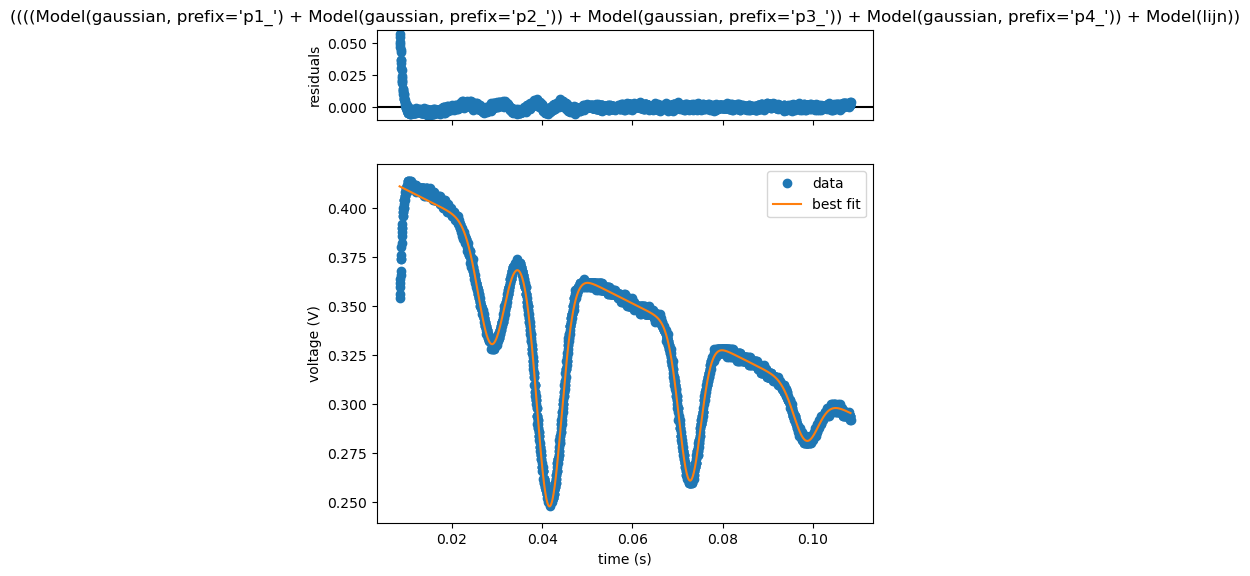

In [99]:
fit_result.plot()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")


In [100]:
fit_result

In [57]:
a = 6834.683/(fit_result.params['p4_mu'].value - fit_result.params['p1_mu'].value)
b = -4271.677 - fit_result.params['p1_mu'].value*a

In [58]:
frequency = a*time + b

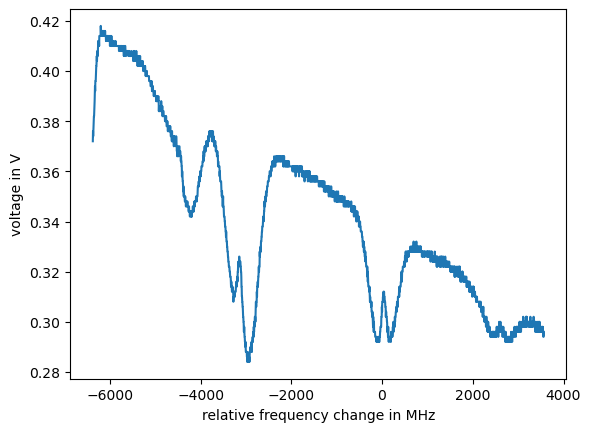

In [59]:
plt.plot(frequency, voltage)
plt.xlabel('relative frequency change in MHz')
plt.ylabel('voltage in V')
plt.show()

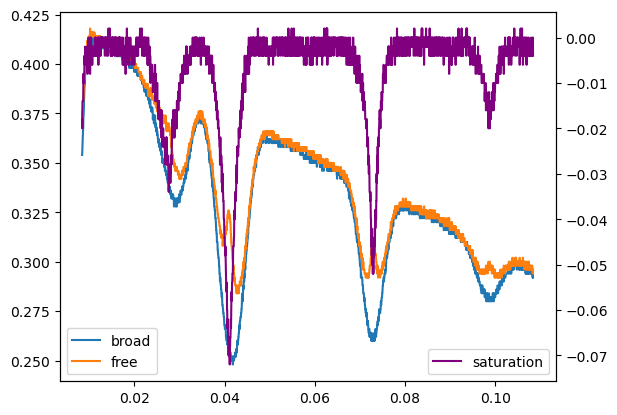

In [79]:
voltage_saturation = [v_b - v for v_b, v in zip(voltage_broad, voltage)]

_, ax = plt.subplots()
ax.plot(time, voltage_broad, label='broad')
ax.plot(time, voltage, label='free')
ax2 = ax.twinx()
ax2.plot(time, voltage_saturation, 'purple', label='saturation')
ax.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.show()

## Find peaks doppler broad data

In [124]:
gauss1 = models.Model(gaussian, prefix='p1_') 
gauss2 = models.Model(gaussian, prefix='p2_') 
gauss3 = models.Model(gaussian, prefix='p3_') 
gauss4 = models.Model(gaussian, prefix='p4_')
gauss5 = models.Model(gaussian, prefix='p5_') 
gauss6 = models.Model(gaussian, prefix='p6_')
gauss7 = models.Model(gaussian, prefix='p7_') 
gauss8 = models.Model(gaussian, prefix='p8_') 
linfunctie = models.Model(lijn, name="lijn")

curve_model_free = gauss1 + gauss2 + gauss3 + gauss4 + gauss5 + gauss6 + gauss7 + gauss8 + linfunctie

In [132]:
params = curve_model_free.make_params(p1_A = -11, p1_mu= 0.03, p1_sigma = 0.003, p2_A = -10, p2_mu = 0.04, p2_sigma = 0.003, p3_A = 3, p3_mu = 0.0422, p3_sigma = 0.003, 
                                       p4_A = 4, p4_mu = 0.07, p4_sigma = 0.003,a = -3,b = 1, p5_A = -11, p5_mu = 0.075, p5_sigma = 0.003, 
                                       p6_A = -11, p6_mu = 0.097, p6_sigma = 0.003, p7_A = -0.1, p7_mu = 0.1, p7_sigma = 0.003, p8_A = -0.05, p8_mu = 0.12, p8_sigma = 0.003)
fit_result_free = curve_model_free.fit(df['voltage'], params,time = df['time'] )

Text(0, 0.5, 'voltage (V)')

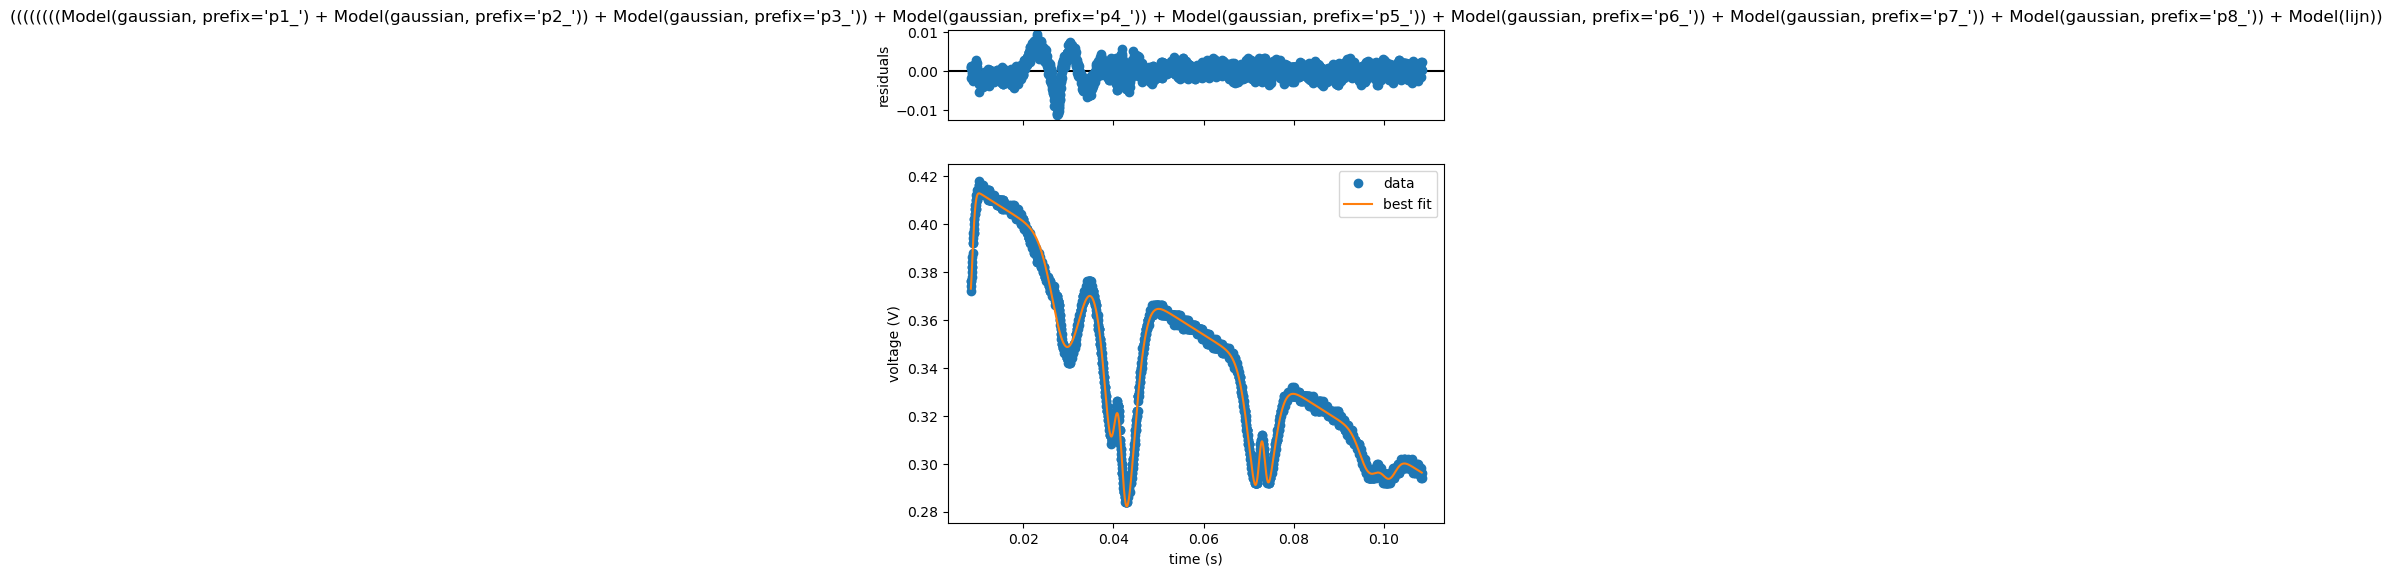

In [133]:
fit_result_free.plot()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")

In [134]:
fit_result_free

## Plot met magnetisch veld


In [ ]:

data = pd.read_csv('doppler_free_new.csv')
voltage = np.array(data['voltage'])
time = np.array(data['time'])data_free = data_free.iloc[:,3:]